In [26]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import add_dummy_feature, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
np.random.seed(42)
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) #column vector
y = 4 + 3 * X + np.random.randn(m, 1) #column vector

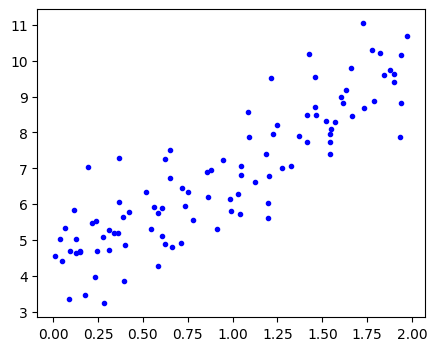

In [3]:
plt.figure(figsize=(5,4))
plt.plot(X, y, "b.")

In [4]:
# calculating normal equation
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(theta_best, "best parameters from the values")
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
print(y_predict, "Predictions")

[[4.21509616]
 [2.77011339]] best parameters from the values
[[4.21509616]
 [9.75532293]] Predictions


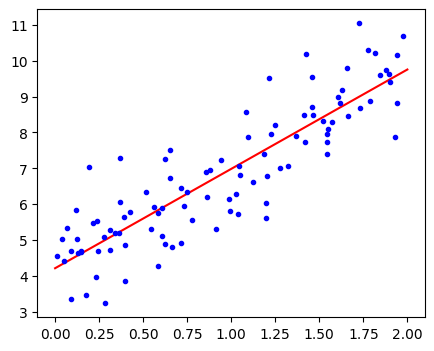

In [5]:
plt.figure(figsize=(5, 4))

plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, 'b.')
plt.show()

In [6]:
# coding gradient descent
eta = .1 # learning rate
n_epochs = 1000
m = len(X_b) #number of instances

np.random.seed(42)
theta = np.random.randn(2,1) #randomly initialized model parameters

for _ in range(n_epochs):
    gradients = 2/m* X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

theta #last gradient theta values

array([[4.21509616],
       [2.77011339]])

In [7]:
# Manual stochastic gradient descent implementation
e_epochs = 50
t0, t1 = 5, 50 # learning rate

def learning_schedule(t):
    return t0/(t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) #random initialzation

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not devide by m
        eta = learning_schedule(epoch* m + iteration)
        theta = theta - eta * gradients
print(theta)

[[4.20492441]
 [2.76038824]]


In [8]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.21278812] [2.77270267]


In [31]:
# polynomial regression

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = .5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [21]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly_b = add_dummy_feature(X_poly)
print(X[0], X_poly[0])
theta = np.linalg.pinv(X_poly_b) @ y
print(theta)
pred_y = X_poly_b @ theta

[-0.75275929] [-0.75275929  0.56664654]
[[1.78134581]
 [0.93366893]
 [0.56456263]]


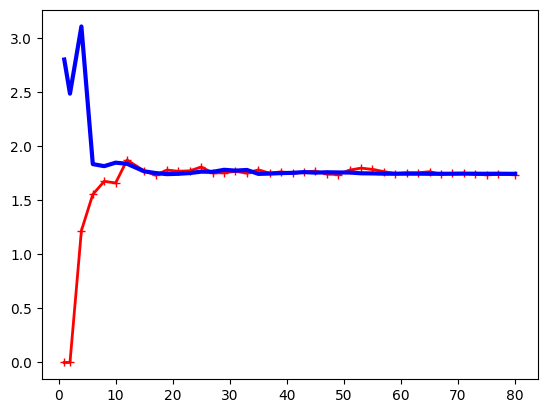

In [25]:
# Learning Curves

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="train")
plt.show()

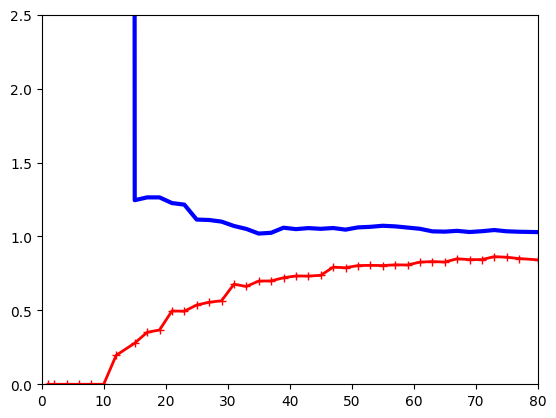

In [35]:
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2,label='train')
plt.plot(train_sizes, valid_errors, "b-", linewidth=3,label='valid')
plt.axis([0, 80, 0, 2.5])
plt.show()